In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('channel.csv')

In [19]:
df.head()

,S.No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df.dtypes

S.No           int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [21]:
df.describe()

,S.No,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [22]:
df.isnull().sum()

S.No         0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

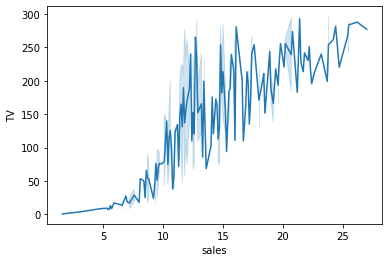

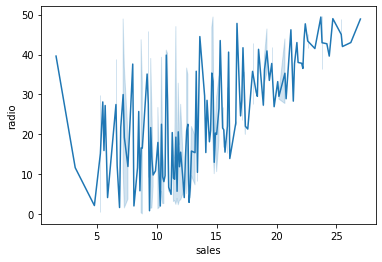

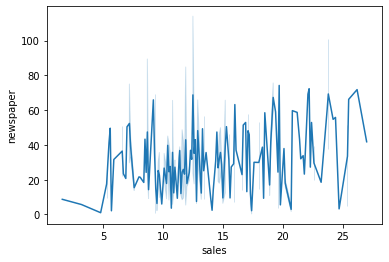

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fields=df[['TV', 'radio','newspaper']]
for i in fields.columns:
    
    sns.lineplot(x=df['sales'],y=i, data=df)
    plt.show()

In [31]:
df[['TV','radio','newspaper','sales']].max()

TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

In [36]:
df[['TV','radio','newspaper','sales']].mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

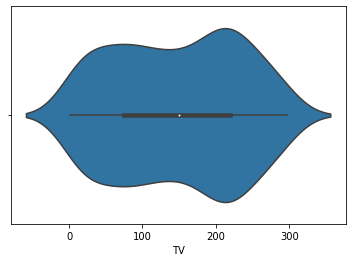

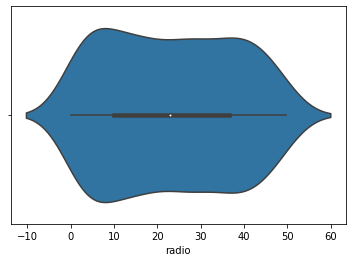

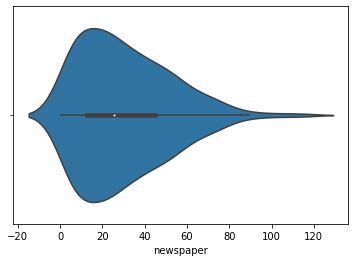

In [29]:
for i in fields.columns:
    sns.violinplot(x=i, data=df)
    plt.show()

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

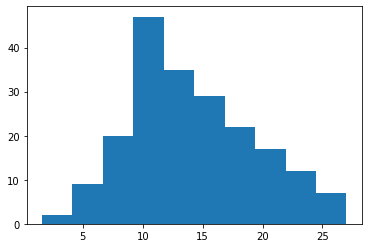

In [30]:
plt.hist((df.sales))

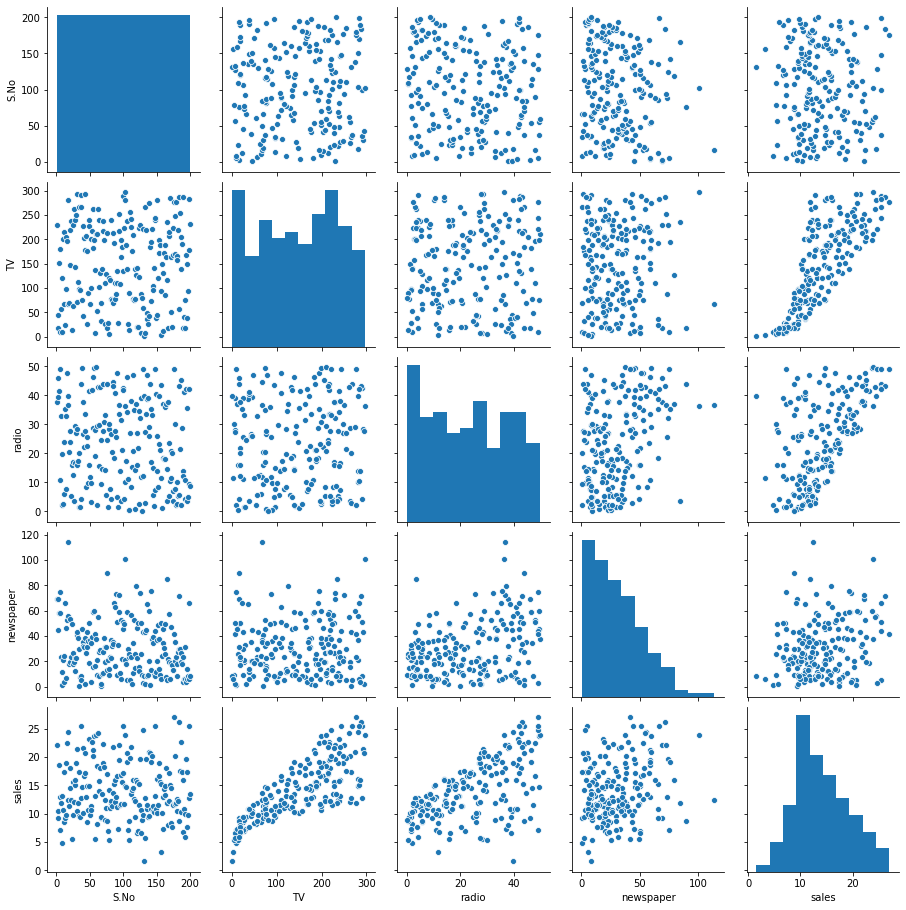

In [32]:
sns.pairplot(df)

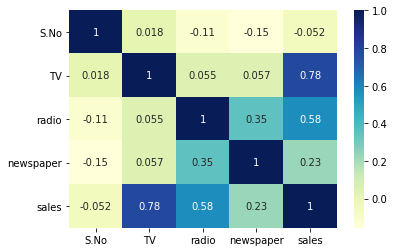

In [33]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Highlights :
    1. As per heatmap & above analysis, TV and sales are most correlated to each other.
    2. Company have spend the most of its money on TV advertising.
    3. Radio holds the second rank against correlation with Sales which also indicate the target segment is left to be captured but the company spend the least money on it.
    4. If the Company would spend its some part of TV advertisement budget on Radio, they can improve the sales of Radio in the market.

In [37]:
df.skew()

S.No         0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [38]:
# removing the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [39]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [40]:
data=df[(z<3).all (axis=1)]

In [41]:
data.shape

(198, 5)

In [42]:
df.shape

(200, 5)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [44]:
x=data.drop(['sales'], axis=1)
x

,S.No,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [46]:
y=data['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [47]:
max_r_score=0
for r_state in range(42,101):
    x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('Max r2 score corresponding to:',final_r_state,'is: ',max_r_score)

r2_score corresponding to random state:  42 is:  0.8990848341790882
r2_score corresponding to random state:  43 is:  0.8752291135526858
r2_score corresponding to random state:  44 is:  0.8117058364229196
r2_score corresponding to random state:  45 is:  0.8666764154798688
r2_score corresponding to random state:  46 is:  0.8725065337165865
r2_score corresponding to random state:  47 is:  0.8915862004650885
r2_score corresponding to random state:  48 is:  0.8659695700786308
r2_score corresponding to random state:  49 is:  0.834613984013017
r2_score corresponding to random state:  50 is:  0.8380732331305454
r2_score corresponding to random state:  51 is:  0.8871919698004077
r2_score corresponding to random state:  52 is:  0.8924031079273218
r2_score corresponding to random state:  53 is:  0.8509064329034484
r2_score corresponding to random state:  54 is:  0.877667326663565
r2_score corresponding to random state:  55 is:  0.8976992914202157
r2_score corresponding to random state:  56 is:  0

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.8827160786305974

In [49]:
x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=52,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.8924031079273218
Root_Mean_Squared_Error:  1.563738008231879


In [50]:
lr.score(x,y)

0.8944151656624704

In [51]:
from sklearn.model_selection import GridSearchCV
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 1}


In [52]:
rd=Ridge(alpha=1)
rd.fit(x,y)
rd.score(x,y)

0.8954399573257374

In [53]:
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 1}


In [54]:
rd=Lasso(alpha=1)
rd.fit(x,y)
rd.score(x,y)

0.8952382692230767

As per the above analysis of above all algorithems - Ridge Regression is the best model for that dataset